In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
df_train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df_test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [4]:
df_train.head(), df_test.head()

(   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
 0            842     0          2.2         0   1       0           7    0.6   
 1           1021     1          0.5         1   0       1          53    0.7   
 2            563     1          0.5         1   2       1          41    0.9   
 3            615     1          2.5         0   0       0          10    0.8   
 4           1821     1          1.2         0  13       1          44    0.6   
 
    mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
 0        188        2  ...         20       756  2549     9     7         19   
 1        136        3  ...        905      1988  2631    17     3          7   
 2        145        5  ...       1263      1716  2603    11     2          9   
 3        131        6  ...       1216      1786  2769    16     8         11   
 4        141        2  ...       1208      1212  1411     8     2         15   
 
    three_g  touch_scree

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_test.tail()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
cat_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

In [11]:
df_train[cat_cols] = df_train[cat_cols].astype('category')

In [12]:
num_cols = ['battery_power', 'clock_speed', 'fc','int_memory', 'm_dep', 'mobile_wt', 
            'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [13]:
labels = df_train['price_range']

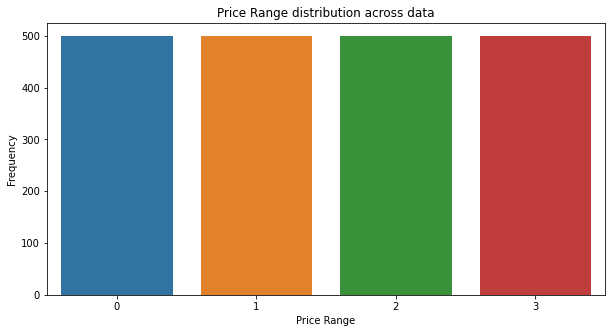

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_train, x='price_range')
plt.title('Price Range distribution across data', fontsize=12)
plt.xlabel('Price Range', fontsize=10)
plt.ylabel('Frequency', )
plt.show()

In [15]:
corrPear = df_train[num_cols].corr(method='pearson')
corrSpea = df_train[num_cols].corr(method='spearman')

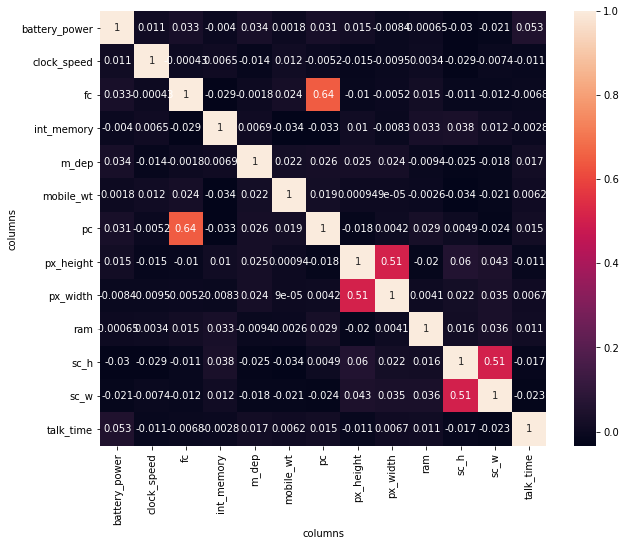

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corrPear, annot=True)
plt.xlabel('columns')
plt.ylabel('columns')
plt.show()

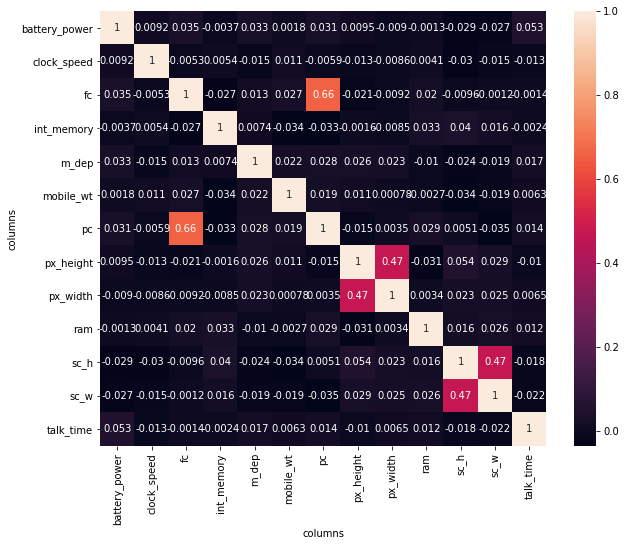

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(corrSpea, annot=True)
plt.xlabel('columns')
plt.ylabel('columns')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

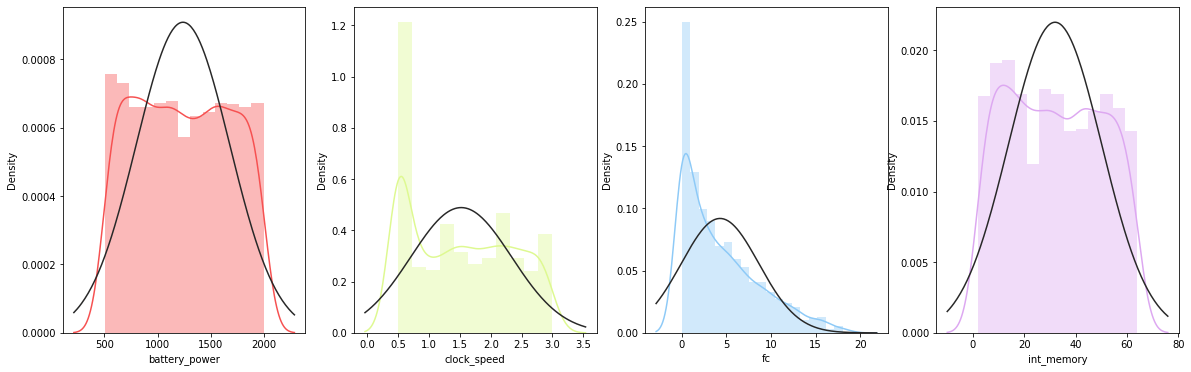

In [18]:
f, ax = plt.subplots(1, 4, figsize=(20,6))
sns.distplot(df_train['battery_power'], fit=norm, color='#F65151', ax=ax[0])
sns.distplot(df_train['clock_speed'], fit=norm, color='#DEF991', ax=ax[1])
sns.distplot(df_train['fc'], fit=norm, color='#8ECAF7', ax=ax[2])
sns.distplot(df_train['int_memory'], fit=norm, color='#DDA8F1', ax=ax[3])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

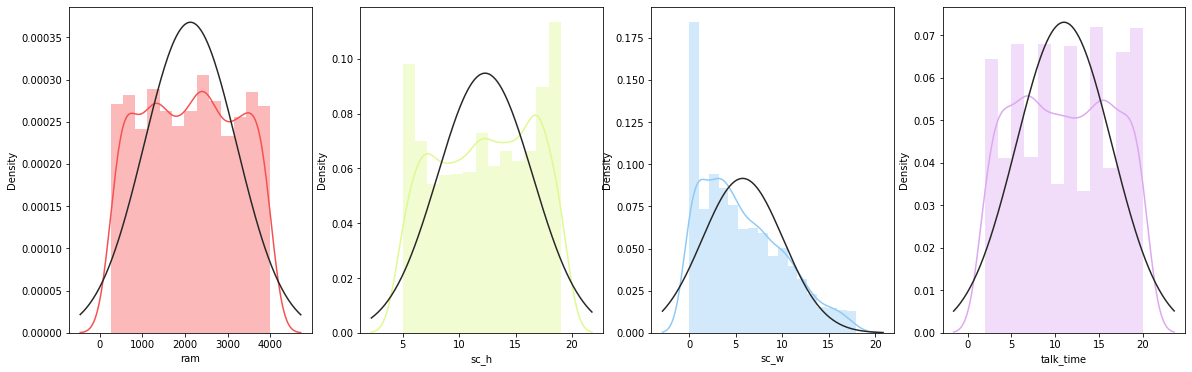

In [19]:
f, ax = plt.subplots(1, 4, figsize=(20,6))
sns.distplot(df_train['ram'], fit=norm, color='#F65151', ax=ax[0])
sns.distplot(df_train['sc_h'], fit=norm, color='#DEF991', ax=ax[1])
sns.distplot(df_train['sc_w'], fit=norm, color='#8ECAF7', ax=ax[2])
sns.distplot(df_train['talk_time'], fit=norm, color='#DDA8F1', ax=ax[3])
plt.show()

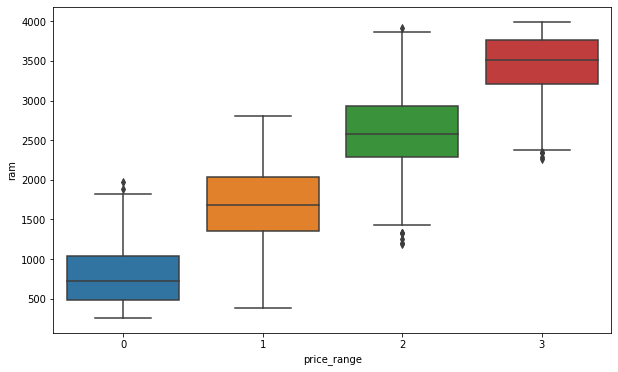

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train, x='price_range', y='ram')
plt.show()

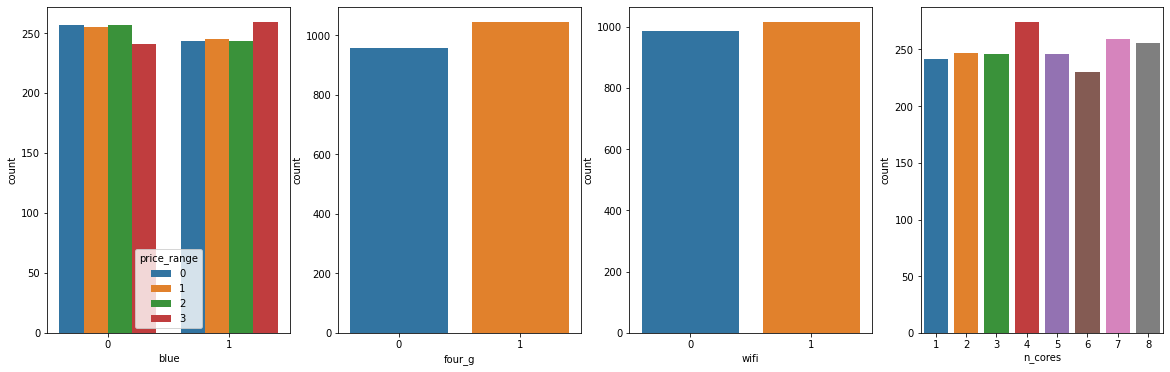

In [21]:
f, ax = plt.subplots(1, 4, figsize=(20,6))
sns.countplot(data=df_train, x='blue', hue='price_range', ax=ax[0])
sns.countplot(data=df_train, x='four_g', ax=ax[1])
sns.countplot(data=df_train, x='wifi', ax=ax[2])
sns.countplot(data=df_train, x='n_cores', ax=ax[3])
plt.show()

In [22]:
df_cat = df_train.drop(num_cols+['price_range'], axis=1)
df_num = df_train.drop(cat_cols+['price_range'], axis=1)

In [23]:
dummy = pd.get_dummies(df_cat)
dummy

,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,n_cores_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
3,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
4,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0
1996,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1997,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
1998,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1


In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
df_mmsc = mm_scaler.fit_transform(df_num)
df_stsc = st_scaler.fit_transform(df_num)
df_mmsc = pd.DataFrame(df_mmsc, columns=df_num.columns)
df_stsc = pd.DataFrame(df_stsc, columns=df_num.columns)
df_mmsc, df_stsc

(      battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
 0          0.227789         0.68  0.052632    0.080645  0.555556   0.900000   
 1          0.347361         0.00  0.000000    0.822581  0.666667   0.466667   
 2          0.041416         0.00  0.105263    0.629032  0.888889   0.541667   
 3          0.076152         0.80  0.000000    0.129032  0.777778   0.425000   
 4          0.881764         0.28  0.684211    0.677419  0.555556   0.508333   
 ...             ...          ...       ...         ...       ...        ...   
 1995       0.195725         0.00  0.000000    0.000000  0.777778   0.216667   
 1996       0.977956         0.84  0.000000    0.596774  0.111111   0.891667   
 1997       0.941884         0.16  0.052632    0.548387  0.666667   0.233333   
 1998       0.675351         0.16  0.210526    0.709677  0.000000   0.541667   
 1999       0.006012         0.60  0.263158    0.693548  0.888889   0.733333   
 
         pc  px_height  px_width      

In [25]:
df_mmsc_comp = pd.concat([df_mmsc, dummy], axis=1)
df_stsc_comp = pd.concat([df_stsc, dummy], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_mmsc_comp, labels, test_size=0.2, shuffle=True, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_stsc_comp, labels, test_size=0.2, shuffle=True, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.1, shuffle=True, random_state=42)

In [27]:
import sklearn
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn import tree
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [28]:
catbst = CatBoostClassifier(random_state=42)
knc = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
gnb = GaussianNB()
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [29]:
rf_model = rf.fit(X_train, y_train)
pred = rf_model.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.77      0.79      0.78        29
           2       0.83      0.72      0.77        40
           3       0.83      0.91      0.87        44

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.83       160
weighted avg       0.84      0.84      0.84       160



In [30]:
rf_model = rf.fit(X_train2, y_train2)
pred = rf_model.predict(X_test2)

print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.86      0.81      0.84        91
           2       0.74      0.82      0.78        92
           3       0.92      0.87      0.89       112

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.87      0.87       400



In [31]:
gb_model = gb.fit(X_train, y_train)
pred = gb_model.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.88      0.79      0.84        29
           2       0.85      0.82      0.84        40
           3       0.89      0.91      0.90        44

    accuracy                           0.89       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.89      0.89      0.89       160



In [32]:
xgb_model = xgb.fit(X_train2, y_train2)
pred = xgb_model.predict(X_test2)

print(classification_report(y_test2, pred))
print(f1_score(y_test2, pred, average='macro'))

[05:07:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.86      0.95      0.90        91
           2       0.86      0.85      0.85        92
           3       0.94      0.89      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

0.9055842115466235


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [33]:
lgbm_model = lgbm.fit(X_train, y_train)
pred = lgbm_model.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.84      0.90      0.87        29
           2       0.85      0.82      0.84        40
           3       0.91      0.89      0.90        44

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



In [34]:
pred = xgb_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.00      0.00      0.00        91
           2       0.11      0.26      0.15        92
           3       0.62      1.00      0.77       112

    accuracy                           0.34       400
   macro avg       0.18      0.32      0.23       400
weighted avg       0.20      0.34      0.25       400



/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F

In [35]:
df_test.drop('id', axis=1, inplace=True)

In [36]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [37]:
df_test[cat_cols] = df_test[cat_cols].astype('category')

In [38]:
test_cat = df_test[cat_cols]
test_num = df_test.drop(cat_cols, axis=1)

In [39]:
dummy_test = pd.get_dummies(test_cat)
dummy_test

,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,n_cores_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
2,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
3,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
4,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0
996,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
997,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0
998,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0


In [40]:
test_stsc = st_scaler.fit_transform(test_num)
test_stsc = pd.DataFrame(test_stsc, columns=test_num.columns)

In [41]:
df_test_comp = pd.concat([test_stsc, dummy_test], axis=1)

In [42]:
y_pred = xgb_model.predict(df_test_comp)
y_pred

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

### GridSearchCV w/ XGB

In [43]:
# create XGBClassifier object
xgb_clf = XGBClassifier()

# set hyperparameters
param_gird = { 'booster' : ['gbtree'],
               'silent' : [False],
               'max_depth' : [5,6,8,9],
               'min_child_weight' : [1,3,5],
               'gamma' : [0,1,2,3],
               'nthread' : [4],
               'colsample_bytree' : [0.5, 0.8],
               'colsample_byleve' : [0.9],
               'n_estimators' : [50],
               'objective': ['multi:softmax'],
               'random_state' : [42] }

# set Kfold
cv = StratifiedKFold(n_splits=3)

# create GridSearchCV object
gscv = GridSearchCV(xgb_clf, param_grid=param_gird, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=3)

# fit gscv
gscv.fit(X_train2, y_train2)
print('final params ', gscv.best_params_)
print('best score ', gscv.best_score_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:30:34] WARNING: ../src/learner.cc:573: 
Parameters: { "colsample_byleve", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:30:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
final params  {'booster': 'gbtree', 'colsample_byleve': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 50, 'nthread': 4, 'objective': 'multi:softmax', 'random_state': 42, 'silent': False}
best score  0.897190859137206


In [44]:
# create best clf
best_xgb = gscv.best_estimator_

# set train Kfold
cv = KFold(n_splits=3, random_state=42, shuffle=True)

# train and eval
y_pred = np.zeros([400])
for tidx, vidx in cv.split(X_train2, y_train2):
    X_train_cv = X_train2.iloc[tidx]
    y_train_cv = y_train2.iloc[tidx]
    X_val_cv = X_train2.iloc[vidx]
    y_val_cv = y_train2.iloc[vidx]
    
    # train with each cv data
    best_xgb.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], early_stopping_rounds=50, verbose=5)
    
    pred = best_xgb.predict(X_test2)
    
    y_pred += pred

result = (y_pred/3.0).round(0)
print(result)

[07:30:35] WARNING: ../src/learner.cc:573: 
Parameters: { "colsample_byleve", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:30:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.15807
[5]	validation_0-mlogloss:0.63974
[10]	validation_0-mlogloss:0.43749
[15]	validation_0-mlogloss:0.35833
[20]	validation_0-mlogloss:0.31392
[25]	validation_0-mlogloss:0.30073
[30]	validation_0-mlogloss:0.29525
[35]	validation_0-mlogloss:0.28975
[40]	validation_0-mlogloss:0.28774
[45]	validation_0-mlogloss:0.28390
[49]	validation_0-mlogloss:0.28386
[07:30:35] WARNI

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[40]	validation_0-mlogloss:0.33811
[45]	validation_0-mlogloss:0.34042
[49]	validation_0-mlogloss:0.33900
[07:30:36] WARNING: ../src/learner.cc:573: 
Parameters: { "colsample_byleve", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:30:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.14920
[5]	validation_0-mlogloss:0.63159
[10]	validation_0-mlogloss:0.42237
[15]	validation_0-mlogloss:0.33438
[20]	validation_0-mlogloss:0.28812
[25]	validation_0-mlogloss:0.27111
[30]	validation_0-mlogloss:0.25698
[35]	validation_0-mlogloss:0.25163
[40]	validation_

In [45]:
print(classification_report(y_test2, result))
print(f1_score(y_test2, result, average='macro'))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.88      0.91      0.90        91
           2       0.85      0.85      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

0.9051627934999047


In [46]:
pred = best_xgb.predict(X_test2)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [47]:
print(pred.shape)
print(pred)

(400,)
[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 1 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 1 1 3 1 3 1 0 0 1 1 1 2 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 3 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 2 3 2 3 2 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 3 0 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 2 2 1 0 0 2 2 3 3 1 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 1 0 0 1 3 3 1 0 1 1 1 1 1 2 2 3 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 2 1 3 0 0 1 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 1 1 2 2 2 2 0 2 3 2 2 2 1 0 1 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 1 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 0 3 3 3 1 0 1 1 1 3 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 2 2 2
 3 3 3 2 1 2 0 3 2 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2]


In [48]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1860 to 535
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   400 non-null    float64
 1   clock_speed     400 non-null    float64
 2   fc              400 non-null    float64
 3   int_memory      400 non-null    float64
 4   m_dep           400 non-null    float64
 5   mobile_wt       400 non-null    float64
 6   pc              400 non-null    float64
 7   px_height       400 non-null    float64
 8   px_width        400 non-null    float64
 9   ram             400 non-null    float64
 10  sc_h            400 non-null    float64
 11  sc_w            400 non-null    float64
 12  talk_time       400 non-null    float64
 13  blue_0          400 non-null    uint8  
 14  blue_1          400 non-null    uint8  
 15  dual_sim_0      400 non-null    uint8  
 16  dual_sim_1      400 non-null    uint8  
 17  four_g_0        400 non-null    